In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error


In [96]:
df = pd.read_csv("Watertypes_data_alt.csv")
# Drop the columns that we don't need
df = df[df.columns[~df.columns.isin(['id', 'Name', 'Paper', 'Water type'])]]#, 'ksed (1/h)'])]]
# drop rows with NaNs
df = df.dropna()
df.head()

,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60,ksed (1/h)
0,8.05,37400,3133.0,19333.0,377.8,10620.0,398.0,1361.4,10.0,477.51,1227.25,0.3980
1,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,10.0,477.51,1227.25,0.0596
2,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,50.0,909.19,1950.62,0.2050
3,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,100.0,886.48,1948.86,0.3830
4,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,200.0,886.48,1948.86,0.6690


In [97]:
# drop the k_sed column 
x = df.drop(['HD_0', 'ksed (1/h)'], axis=1)
column_names = x.columns 

#scale the columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = column_names)

y = df['ksed (1/h)']

print('x data shape:', x_scaled.shape)
print('y data shape:', y.shape)
x_scaled.head()
#x.head()

x data shape: (35, 10)
y data shape: (35,)


,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_60
0,-0.608594,0.479412,0.879837,0.80091,0.669261,0.735029,0.835233,0.879222,-0.267350,1.301958
1,-0.971676,0.425053,0.460392,0.61859,0.462668,0.557866,0.713158,0.654881,-0.267350,1.301958
2,-0.971676,0.425053,0.460392,0.61859,0.462668,0.557866,0.713158,0.654881,0.534711,2.738987
3,-0.971676,0.425053,0.460392,0.61859,0.462668,0.557866,0.713158,0.654881,1.537288,2.735491
4,-0.971676,0.425053,0.460392,0.61859,0.462668,0.557866,0.713158,0.654881,3.542441,2.735491


In [98]:
# Split the dataset to train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("x_train = ", x_train.shape)
print("y_train = ", y_train.shape)
print("x_test = ", x_test.shape)
print("y_test = ", y_test.shape)

x_train =  (28, 10)
y_train =  (28,)
x_test =  (7, 10)
y_test =  (7,)


In [99]:
RF = RandomForestRegressor(n_estimators = 100,
                           max_depth = 50,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           criterion = 'squared_error', random_state=0)

RF.fit(x_train, y_train)

y_train_pred = RF.predict(x_train)
y_test_pred = RF.predict(x_test)

print(f'Train MAPE = {mean_absolute_percentage_error(y_train, y_train_pred)}' )
print(f'Test MAPE = {mean_absolute_percentage_error(y_test, y_test_pred)}' )

Train MAPE = 0.32874527338488624
Test MAPE = 2.163494104486969


In [100]:
importances = RF.feature_importances_
predictors_names = x_train.columns
forest_importances = pd.Series(importances, index=predictors_names)
forest_importances[forest_importances>0].sort_values(ascending=False)

HD_60                   0.599120
Concentration (mg/l)    0.171392
pH                      0.167661
Cl (mg/l)               0.015324
K (mg/l)                0.012016
Conductivity (uS)       0.011136
Na (mg/l)               0.009956
SO4 (mg/l)              0.008586
Mg (mg/l)               0.002954
Ca (mg/l)               0.001856
dtype: float64

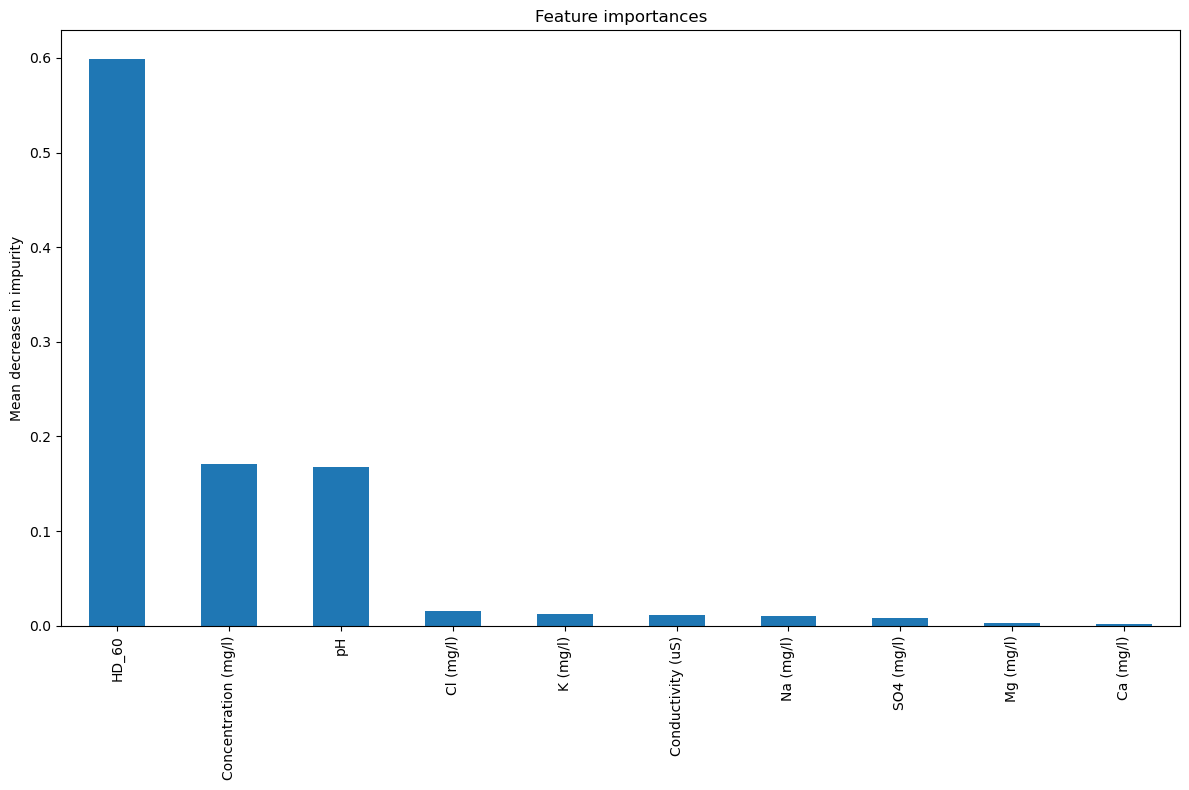

In [101]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
forest_importances[0:15].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()